In [1]:
import qiskit
from qiskit import QuantumCircuit, transpile, execute
from qiskit.extensions import UnitaryGate
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

In [2]:
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

$\ket{\Psi}=\ket{uu,du,ud,dd}$

In [3]:
# Display measurement results
def show_barchart(counts):
    y_pos=np.arange(2)
    objects=['a','b']
    plt.xticks(y_pos, objects)
    plt.bar(y_pos, counts)
def show_statevector(statevector):
    print(f'statevector uu:{np.around(statevector[0],3)} du: {np.around(statevector[1],3)} \
    ud: {np.around(statevector[2], 3)} dd: {np.around(statevector[3],3)}')
def get_probabilities(statevector):
    n_uu = np.abs(statevector[0])**2
    n_du = np.abs(statevector[1])**2
    n_ud = np.abs(statevector[2])**2
    n_dd = np.abs(statevector[3])**2
    return n_uu, n_du, n_ud, n_dd


## Verify that the matrix for the gate is unitary

In [4]:
def unitary(U):
    assert(np.around(np.matmul(np.conj(np.transpose(U)),U),5)==np.eye(2)).all()

## Gate for non-vertical measurement basis

In [5]:
def measurement_gate(theta, show=False):
    U=np.array([[math.cos(theta/2),complex(0,1)*math.sin(theta/2)],\
                [complex(0,1)*math.sin(theta/2),math.cos(theta/2)]])
    U=np.transpose(U)
    if show:
        print('unitary matrix for projection')
        print(U[0,0],U[0,1])
        print(U[1,0],U[1,1])
    unitary(U)
    return U
    

## Project state vector onto new measurement basis

In [6]:
def project(bit,circuit, theta):
    U = measurement_gate(theta)
    circuit.unitary(U,[bit])
    return circuit

## Measure with magnetic field not vertical

In [7]:
def measure(bit, circuit, angle):
    circuit = project(bit, circuit, angle)
    circuit.measure(bit,bit)
    return circuit

## Make entangled state
$\ket{ud}-\ket{du}$

In [8]:
def make_entangled(show=False):
    circuit=qiskit.QuantumCircuit(2,2)
    circuit.h(0)
    circuit.cx(0,1)
    circuit.x(1)
    circuit.p(math.pi,1)
    return circuit

## Show entangled states

In [9]:
show=False
if show:
    shots=10
    n_uu=n_ud=n_du=n_dd=0
    for i in range(shots):
        circuit=make_entangled()
        circuit.measure(0,0)
        circuit.measure(1,1)
        simulator = qiskit.Aer.get_backend('statevector_simulator')
        result=qiskit.execute(circuit, backend=simulator).result()
        statevector = result.get_statevector()
        show_statevector(statevector)


$\ket{\Psi}=\ket{ud}-\ket{du}$

$\ket{\Psi}=(\frac{1}{\sqrt{2}})(0,-1,1,0)$

## Verification that the qubit states are equally probable no matter what "angle of magnetic field" is used

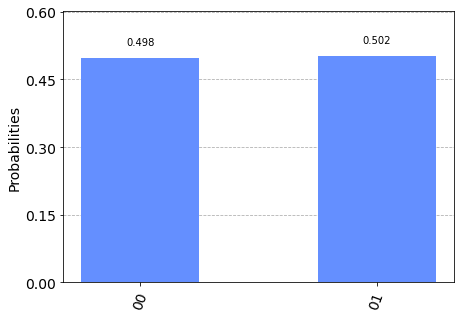

In [10]:
circuit=make_entangled()
theta=math.radians(30)
circuit = measure(0,circuit, theta)
simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=100000)
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)

In [11]:
theta=math.radians(45)
circuit = measure(0,circuit, theta)
circuit.measure(0,0)
simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=100000)
result = job.result()
counts = result.get_counts(circuit)


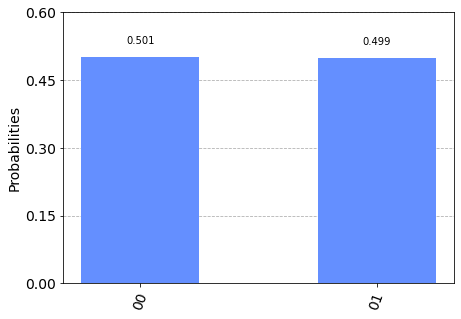

In [12]:

plot_histogram(counts)


## Verify Bell's Inequality

In [13]:
theta = math.radians(45)
shots=1000000
circuit=make_entangled()
simulator = QasmSimulator()
circuit.measure(0,0)
circuit=measure(1,circuit,theta)
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result=job.result()
counts = result.get_counts(circuit)
p_up_up45 = counts['00']/shots

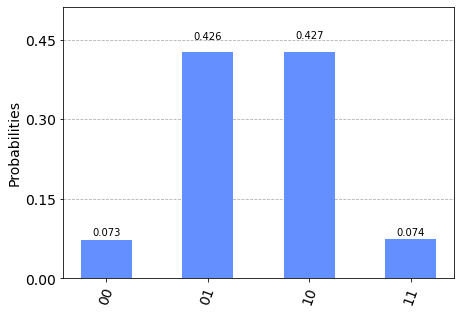

In [14]:
plot_histogram(counts)

In [15]:
theta = math.radians(90)
shots=1000000
circuit=make_entangled()
simulator = QasmSimulator()
circuit.measure(0,0)
circuit=measure(1,circuit,theta)
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result=job.result()
counts = result.get_counts(circuit)
p_up_up90 = counts['00']/shots
print(np.round(p_up_up45,3), np.round(p_up_up90,3))

0.073 0.25


In [16]:
assert(2*p_up_up45>= p_up_up90)

AssertionError: 